<a href="https://colab.research.google.com/github/El-Do-RaDo/Hands_on_ML/blob/master/eg1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [0]:
uploaded = files.upload()

Saving gdp_per_capita.csv to gdp_per_capita.csv
Saving oecd_bli_2015.csv to oecd_bli_2015.csv


In [0]:
#loading the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',',delimiter='\t',encoding='latin1', na_values="n/a")

In [0]:
oecd_bli.head()

In [0]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [0]:
#preparing the data
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

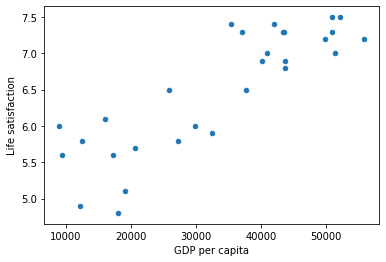

In [0]:
#visualize the data 
country_stats.plot(kind='scatter' , x = "GDP per capita" , y = "Life satisfaction")
plt.show()

In [0]:
#select the model required 
model = sklearn.linear_model.LinearRegression()

In [0]:
#train the model with the data
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#try to make new prediction
x_new = [[22587]]
print(model.predict(x_new))

[[5.96242338]]
